## Imports

In [1]:
#Do imports just once and for all
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import svds
from scipy.linalg import inv, norm
import math


import json

#instead of popup, plot images inline
%matplotlib inline

# Code

## Input

In [ ]:
#Test Daten (dictionary) 
docs = {    
    'file1': ['ein','test','für','Dokument','eins'],    
    'file21': ['ein','weiteres','Dokument'],
    'file22': ['ein','weiteres','Dokument'],
    'file3': ['alle','guten','Dinge','sind','drei'],
    'file4': ['ein','test','für','Dokument','drei'], 
}

In [ ]:
# Testing load and save
# - Numpy Arrays: https://docs.scipy.org/doc/numpy/reference/generated/numpy.save.html
# - General: 
#   - Input/Output: https://docs.python.org/3.3/tutorial/inputoutput.html
#   - Write JSON Dump: http://stackoverflow.com/questions/12309269/how-do-i-write-json-data-to-a-file-in-python

#import json
with open('files/test.dict', 'w+') as outfile:
    json.dump(docs, outfile)

with open('files/test.dict', 'r') as infile:
    docs2 = json.load(infile)
    
docs2

## Sparse DTM

In [ ]:
#https://datascience.blog.wzb.eu/2016/06/17/creating-a-sparse-document-term-matrix-for-topic-modeling-via-lda/
# -> adapted to fit TermxDoc Matrix without additional transpose at the end

#Init Vocabulary (Set)
vocab = set()

#Init Count of Non-Zero Values
n_nonzero = 0

#Iterate over documents an create vocabulary
for docterms in docs.values():
    unique_terms = set(docterms)    # all unique terms of this doc (set of terms)
    vocab |= unique_terms           # set union: add unique terms of this doc
    n_nonzero += len(unique_terms)  # increase Non-Zero count by adding count of unique terms in this doc
    

#convert to numpy for processing
docpaths = np.array(list(docs.keys())) # keys of dictionary (order of dictionary is used, but this doesn't correspond to order of inserts!)
vocab = np.array(list(vocab)) 

#Array containing sorted indices
vocab_sorter = np.argsort(vocab)   

#print(vocab_sorter) #sorted indizes 
#print(vocab[vocab_sorter]) #outputs sorted vocabulary

ndocs = len(docpaths)
nvocab = len(vocab)

#Initialize components of COO-Matrix (values, row indizes, col indizes) with emtpy values (for all non-zero elements)
data = np.empty(n_nonzero, dtype=np.float32)     # all non-zero term frequencies at data[i,k]
rows = np.empty(n_nonzero, dtype=np.intc)     # row index for [i,k]th data item (ith term freq.)
cols = np.empty(n_nonzero, dtype=np.intc)     # column index for [i,k]th data item (kth document)

#Init index (w.r.t. position in arrays of sparse COO matrix)
ind = 0   
global_indices = []
# go through all documents with their terms
for docpath, terms in docs.items():
    # find indices into  such that, if the corresponding elements in  were
    # inserted before the indices, the order of  would be preserved
    # -> array of indices of  in 
    term_indices = vocab_sorter[np.searchsorted(vocab, terms, sorter=vocab_sorter)]

    # count the unique terms of the document and get their vocabulary indices
    uniq_indices, counts = np.unique(term_indices, return_counts=True)
    
    # add (unique) indices of current doc to a list which is later on used for df
    global_indices.extend(uniq_indices)
    
    n_vals = len(uniq_indices)  # = number of unique terms
    ind_end = ind + n_vals  #  to  is the slice that we will fill with data

    data[ind:ind_end] = counts                  # save the counts (term frequencies)
    rows[ind:ind_end] = uniq_indices            # save the row index: index in 
    doc_idx = np.where(docpaths == docpath)     # get the document index for the document name
    cols[ind:ind_end] = np.repeat(doc_idx, n_vals)  # save it as repeated value

    ind = ind_end  # resume with next document -> add data to the end

#calculate the term df by counting the occurence of the unqiue indices per document -> result is sorted by index
global_unique_indices, global_counts = np.unique(global_indices, return_counts=True)

#calculation of idf
idf = ndocs/global_counts

#select idf according to indices in "rows" vector for DTM and multiply it with "data"(tf) vector -> tf-idf
data = np.multiply(data,idf[rows])

#Construct DTM as COO Matrix
dtm = coo_matrix((data, (rows, cols)), shape=(nvocab, ndocs), dtype=np.float32)

In [ ]:
print(dtm.toarray())
print(vocab)
print(docpaths)

In [ ]:
k = 4

U, s, V = svds(dtm.asfptype(), k=k)

In [ ]:
import sys
try:
    self.tdm = load_npz(loadPath + "tfidf.tdm")

    self.docpaths = np.load(loadPath + "tfidf.docs")
    self.vocab = np.load(loadPath + "tfidf.vocab")
    self.idf= np.load(loadPath + "tfidf.idf")

except:
    print("TF-IDF: Load from file failed - ", sys.exc_info()[0])
    exc = sys.exc_info()

In [ ]:
exc

In [ ]:
vec = dtm.toarray()[:,0]

In [ ]:
dv = (inv(np.diag(s)).dot(U.transpose())).dot(vec)

In [ ]:
sim = (V.transpose().dot(dv))/(np.sqrt(np.diag(V.transpose().dot(V)))*norm(dv))

In [ ]:
V

In [ ]:
np.apply_along_axis( myfunction, axis=1, arr=mymatrix )

In [ ]:
np.sum(V.transpose()**2,axis=-1)**(1./2)

In [ ]:
for x in np.nditer(V):
    print(norm(x))

In [ ]:
sorter = np.argsort(sim)[::-1]
sim[sorter]

# SVD Analysis


In [2]:
from wordcloud import WordCloud
path = "../lib/files/"
s = np.load(path + "svd.s.npy")
Ut = np.load(path + "svd.Ut.npy")
V = np.load(path + "svd.V.npy")
k = np.load(path + "svd.k.npy")
docs = np.load(path + "svd.docs.npy")
vocab = np.load(path + "tfidf.vocab.npy")
SiUt = inv(np.diag(s)).dot(Ut)

In [13]:
Ut[]

array([ 0.04119695,  0.0403321 ,  0.0403321 ,  0.03968883,  0.03890153,
        0.03859453,  0.03825825,  0.03825825,  0.03825825,  0.03825825], dtype=float32)

In [2]:
import os
os.pardir

'..'

In [32]:
topic = 20
n = 50
topic_terms_mask = np.argsort(Ut[topic,:])[::-1][:n]#Ut[topic,:] > 0
topic_terms_tfidf = Ut[topic,topic_terms_mask]
topic_terms_vocab = vocab[topic_terms_mask]
topic_terms_dict = dict(zip(topic_terms_vocab, topic_terms_tfidf))
print(topic_terms_dict)

topic_docs_mask = np.argsort(V[:,topic])[::-1][:n]#V[:,topic] > 0
topic_docs_tfidf = V[topic_docs_mask,topic]
topic_docs_paths = docs[topic_docs_mask]
topic_docs_paths_ng = np.unique([i.split('/')[0] for i in topic_docs_paths])
topic_docs_dict = dict(zip(topic_docs_paths_ng, topic_docs_tfidf))
print(topic_docs_dict)

{'look': 0.027824199, 'thing': 0.024208996, 'save': 0.023767654, 'one': 0.025983529, 'best': 0.026192635, 'tell': 0.026221894, 'anyway': 0.024624262, 'go': 0.029417312, 'nice': 0.024792437, 'back': 0.026854314, 'something': 0.03246576, 'better': 0.032228168, 'thats': 0.02595762, 'really': 0.032375265, 'jesus': 0.025686888, 'still': 0.025321016, 'way': 0.026931213, 'team': 0.025904281, 'cant': 0.030577553, 'wrong': 0.02667743, 'good': 0.03248876, 'god': 0.038226403, 'see': 0.027673693, 'else': 0.02478311, 'doesnt': 0.02611346, 'know': 0.033962991, 'would': 0.025194829, 'got': 0.037946261, 'writes': 0.025494438, 'much': 0.028497802, ':': 0.026051037, 'im': 0.037044447, 'win': 0.026929986, 'wasnt': 0.02403144, 'like': 0.028683934, 'hit': 0.026058573, 'ive': 0.031486925, 'around': 0.02851788, 'anything': 0.024147578, 'going': 0.026930045, 'game': 0.030975334, 'say': 0.028256614, 'dont': 0.039947942, 'didnt': 0.034123827, 'maybe': 0.025412969, 'time': 0.024440017, 'think': 0.037901912, 'get

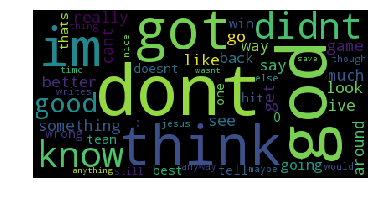

In [29]:
wordcloud = WordCloud().generate_from_frequencies(topic_terms_dict)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off");

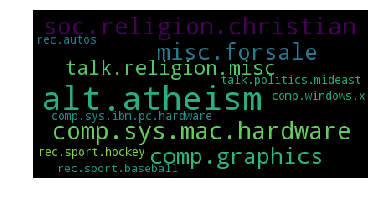

In [33]:
wordcloud = WordCloud().generate_from_frequencies(topic_docs_dict)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off");

## TESTS

In [ ]:
doc = ['ein','ein','weiteres','Dokument']

In [ ]:
doc

In [ ]:
vec

In [ ]:
idf

In [ ]:
vocab

In [ ]:
a = [np.where(vocab==item) for i, item in enumerate(doc) if item in vocab]

In [ ]:
indices = [np.where(vocab == item) for i, item in enumerate(doc) if item in vocab]
indices_unique, counts = np.unique(indices, return_counts=True)
vec = np.empty(len(vocab), dtype=np.float32)
vec[indices_unique] = counts * idf[indices_unique]

In [ ]:
vec

In [ ]:
np.where(doc in vocab)

In [ ]:
from scipy.linalg import svd, inv

In [ ]:
U, s, V = svd(dtm.todense())

In [ ]:
s

In [ ]:
plt.plot(range(1,k+2),s, 'bo')
plt.axis([1, k, 0, s.max()])

In [ ]:
inv(np.diag(s))

In [ ]:
U.dot(np.diag(s)).dot(V.transpose())

In [ ]:
V

In [ ]:
np.diag(s)

In [ ]:
from scipy.sparse import coo_matrix, load_npz
saved_tdm = load_npz("../lib/files/tfidf.tdm.npz")

In [ ]:
saved_tdm.toarray()[1:100,1:100]

In [ ]:
U, s, V = svds(saved_tdm.asfptype(), k=20)

In [ ]:
with open("../lib/files/bow.dict", 'r') as infile:
    docs = json.load(infile)

In [ ]:
docs

In [ ]:
i = 0
for key in docs.keys():
    if(i> 30 ):
        break
    print(len(docs.get(key)))
    i+= 1
    


In [ ]:
docs.get('sci.space/59848')

In [ ]:
docs.get('sci.electronics/52434')

In [ ]:
Ut.transpose()[:,100:201].shape

In [ ]:
Vt.transpose()[100:200,:]

In [ ]:
k = 199
plt.plot(range(1,k+1),s[::-1], 'bo')
plt.axis([1, k, 0, s.max()])

In [ ]:
# the histogram of the data
plt.hist(saved_tdm.data)
plt.title("Histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")


In [ ]:
saved_tdm.data == min(saved_tdm.data)

In [ ]:
saved_tdm.row[saved_tdm.data == max(saved_tdm.data)]

In [ ]:
vocab = np.load("../lib/files/" + "tfidf.vocab.npy")

In [ ]:
vocab[saved_tdm.row[saved_tdm.data >= (max(saved_tdm.data)/10)]]

In [ ]:
len(saved_tdm.data[saved_tdm.data >= (max(saved_tdm.data)/10)])

In [ ]:
a = [10,100]

In [ ]:
import math
math.log(a)